In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Ex_rate.csv', parse_dates=['date'])

In [3]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
df.tail()

,date,Ex_rate
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825
7587,10-10-2010 00:00,0.720825


In [5]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [6]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


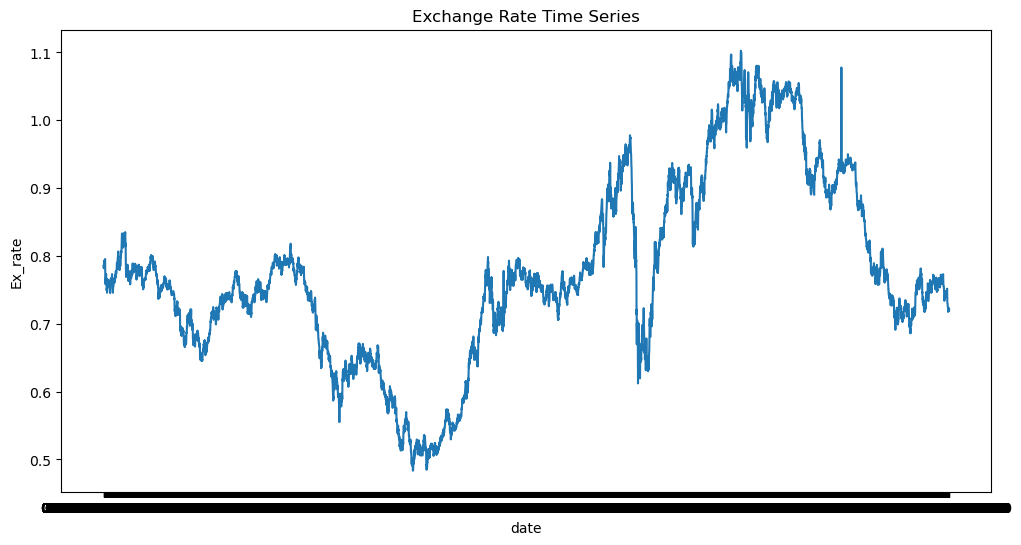

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Ex_rate', data=df)
plt.title('Exchange Rate Time Series')
plt.xlabel('date')
plt.ylabel('Ex_rate')
plt.show()

In [8]:
missing_values = df.isnull().sum()  ## There is no missing values
print(missing_values)

date       0
Ex_rate    0
dtype: int64


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [10]:
ts_df= df['Ex_rate']

In [11]:
ts_df_log= np.log(ts_df)

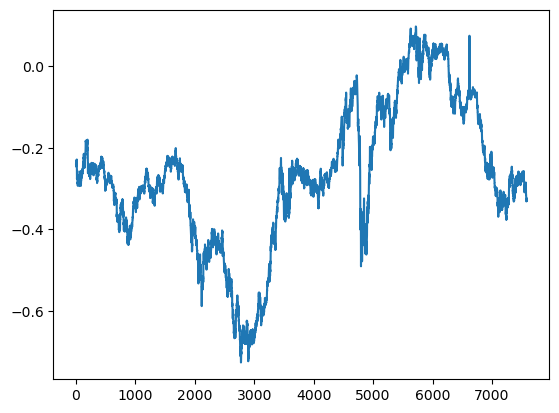

In [12]:
plt.plot(ts_df_log)

In [13]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')

    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


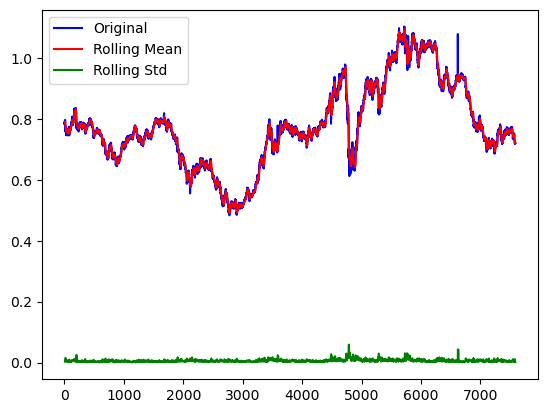

In [14]:
test_stationarity(df['Ex_rate'])

In [15]:
adfuller(df['Ex_rate'])

(-1.6649941807381343,
 0.44923273535979974,
 1,
 7586,
 {'1%': -3.4312123140180137,
  '5%': -2.861921078147796,
  '10%': -2.5669728434336108},
 -55835.06254628545)

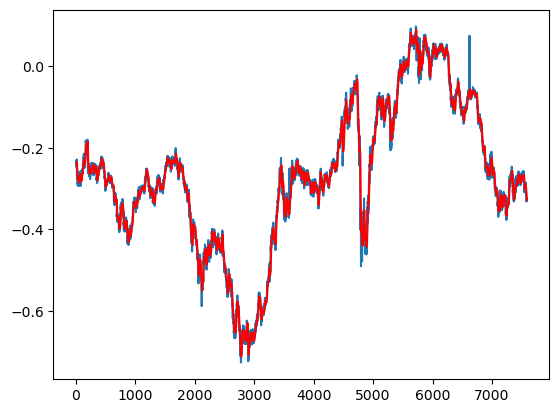

In [16]:
movingAverage = ts_df_log.rolling(window = 12).mean()
plt.plot(ts_df_log)
plt.plot(movingAverage, color='red')

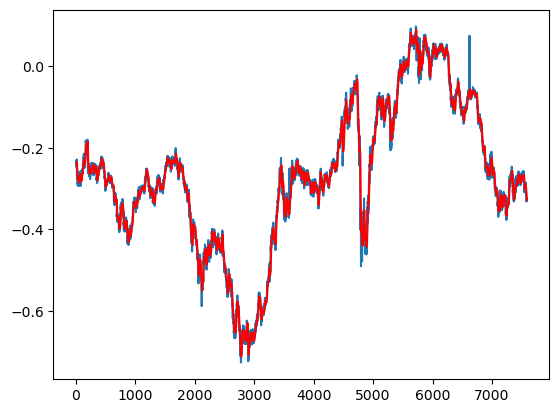

In [17]:
movingAverage = ts_df_log.rolling(window = 12).mean()
movingSTD = ts_df_log.rolling(window = 12).std()
plt.plot(ts_df_log)
plt.plot(movingAverage,color='red')

In [18]:
ts_df_log_diff = ts_df_log - movingAverage
ts_df_log_diff.head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.007278
12    0.005678
13    0.006632
14   -0.017983
Name: Ex_rate, dtype: float64

In [19]:
ts_df_log_diff.dropna(inplace=True)
ts_df_log_diff.shape

(7577,)

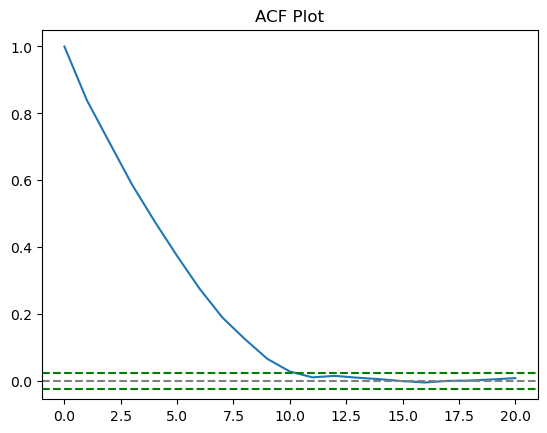

In [20]:
# Plotting the ACF curve

plt.plot(np.arange(0,21), acf(ts_df_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_df_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_df_log_diff)), linestyle = '--', color = 'green')
plt.title('ACF Plot')
plt.show()

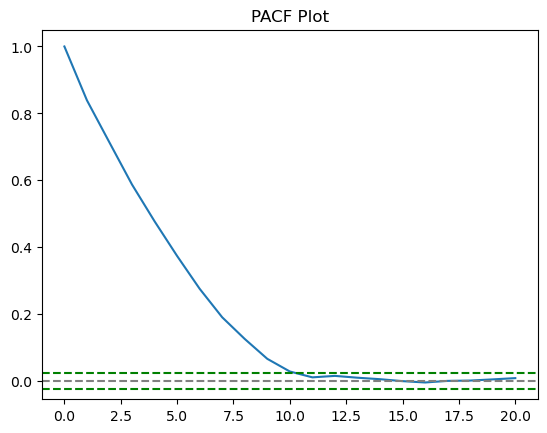

In [21]:
# Plotting the PACF curve

plt.plot(np.arange(0,21), acf(ts_df_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_df_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_df_log_diff)), linestyle = '--', color = 'green')
plt.title('PACF Plot')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               26253.679
Date:                Mon, 16 Sep 2024   AIC                         -52501.358
Time:                        19:23:43   BIC                         -52480.555
Sample:                             0   HQIC                        -52494.219
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1083      0.060     -1.813      0.070      -0.225       0.009
ma.L1          0.0074      0.060      0.124      0.901      -0.110       0.125
sigma2       5.78e-05   2.05e-07    281.560      0.0

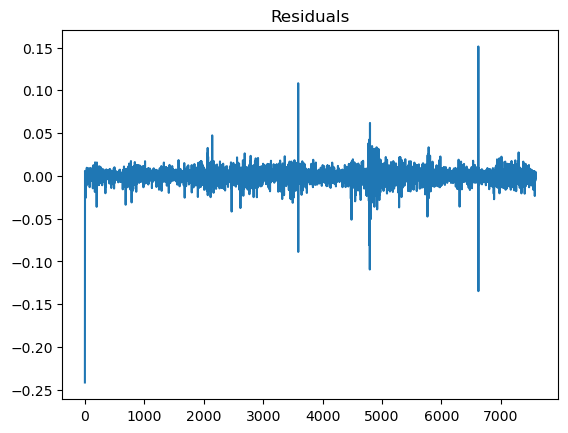

7588   -0.327361
7589   -0.327361
7590   -0.327361
7591   -0.327361
7592   -0.327361
7593   -0.327361
7594   -0.327361
7595   -0.327361
7596   -0.327361
7597   -0.327361
Name: predicted_mean, dtype: float64


In [22]:
import statsmodels.api as sm

# Parameter selection (assuming p=1, d=1, q=1 based on ACF and PACF plots)
model = sm.tsa.arima.ARIMA(ts_df_log, order=(1, 1, 1))
results = model.fit()

# Diagnostics
print(results.summary())
plt.plot(results.resid)
plt.title('Residuals')
plt.show()

# Forecasting
forecast = results.forecast(steps=10)  # Forecast for the next 10 periods
print(forecast)

In [23]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['Ex_rate'], order=(1,1,1))

In [25]:
result = model.fit()

In [26]:
result

<Axes: >

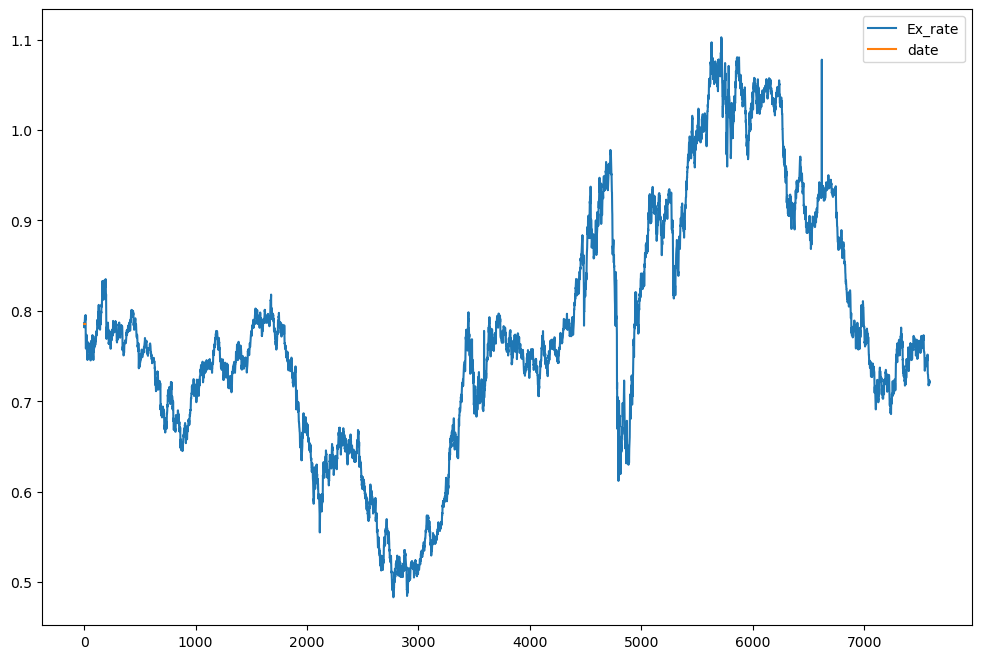

In [27]:
df['date']= result.predict(start=1,end=10,dynamic=True)
df[['Ex_rate','date']].plot(figsize=(12,8))

Results of Dickey-Fuller Test :

Test Statistic                -1.404275e+01
p-value                        3.281274e-26
#Lags Used                     2.900000e+01
Number of Observations Used    7.547000e+03
Critical Value (1%)           -3.431217e+00
Critical Value (5%)           -2.861923e+00
Critical Value (10%)          -2.566974e+00
dtype: float64


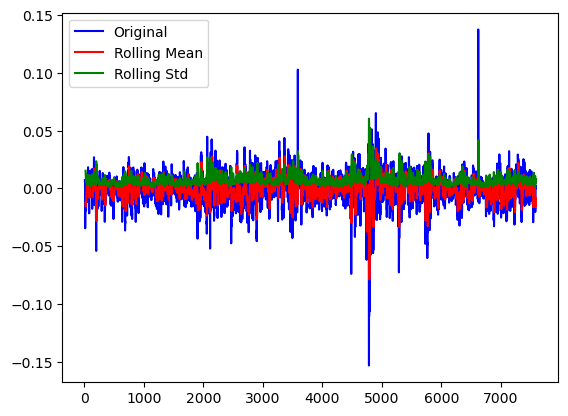

In [28]:
test_stationarity(ts_df_log_diff)

In [29]:
result.predict()

0       0.000000
1       0.785500
2       0.782286
3       0.786058
4       0.786089
          ...   
7583    0.718837
7584    0.718522
7585    0.721400
7586    0.723017
7587    0.721136
Name: predicted_mean, Length: 7588, dtype: float64

In [30]:
result.forecast(steps=30)

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
7617    0.720826
Name: predicted_mean, dtype: float64

In [31]:
result.fittedvalues

0       0.000000
1       0.785500
2       0.782286
3       0.786058
4       0.786089
          ...   
7583    0.718837
7584    0.718522
7585    0.721400
7586    0.723017
7587    0.721136
Length: 7588, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

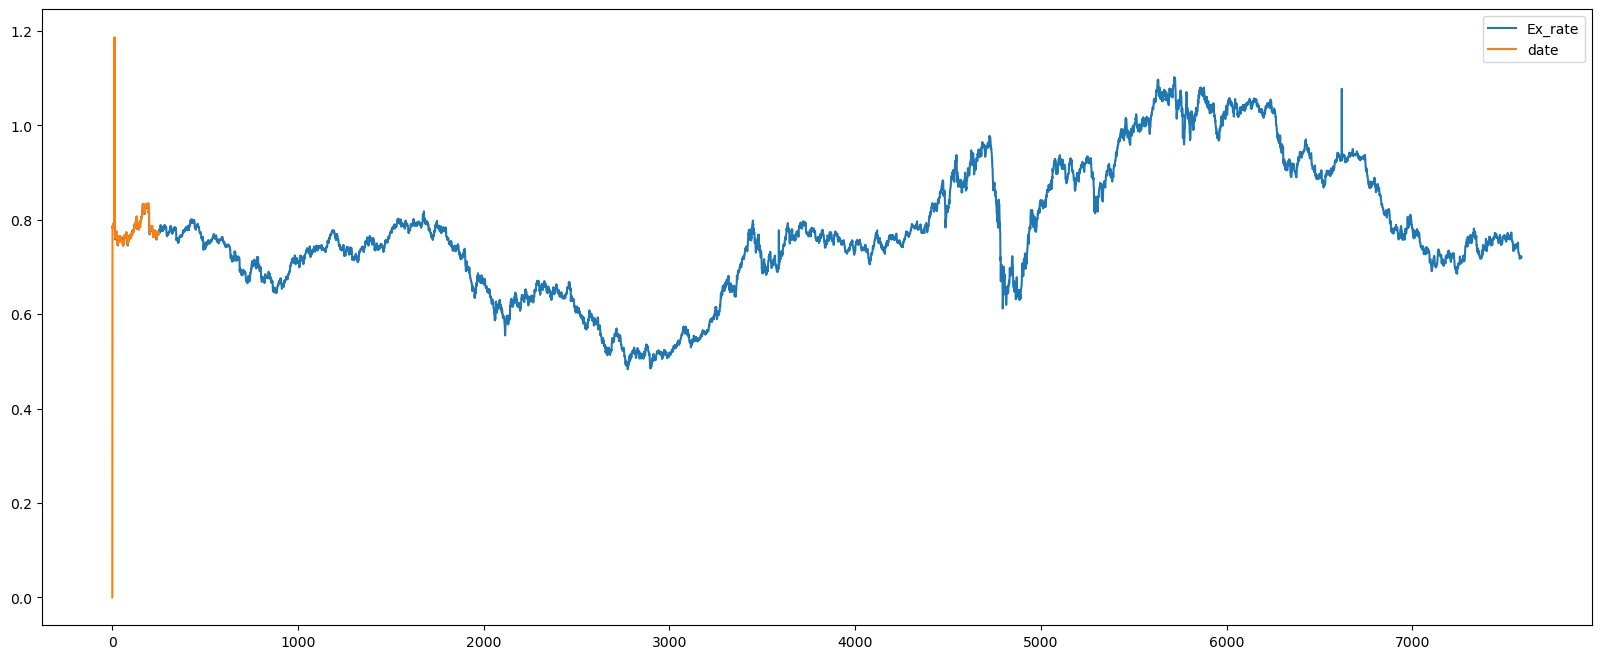

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Model= SARIMAX(df['Ex_rate'],order=(1,1,1),seasonal_order=(1,1,1,12))
results1=Model.fit()
df['date']= results1.predict(start=0,end=250)
df[['Ex_rate','date']].plot(figsize=(20,8))

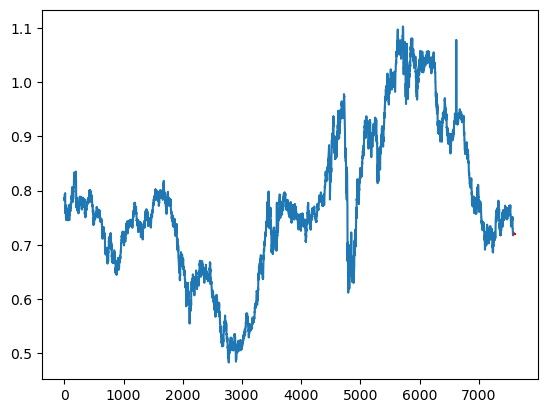

In [33]:
# Fit the Simple Exponential Smoothing model
model = sm.tsa.SimpleExpSmoothing(df['Ex_rate']).fit()

# Forecast future values
forecast = model.forecast(steps=30)

# Visualize the results
plt.plot(df['Ex_rate'])
plt.plot(forecast, color='red')
plt.show()

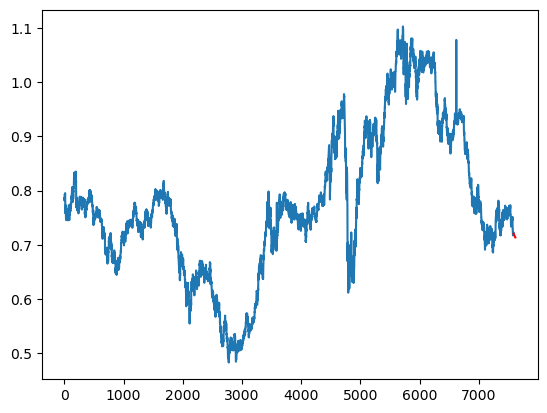

In [34]:
model = sm.tsa.Holt(df['Ex_rate']).fit()
# Forecast future values
forecast = model.forecast(steps=30)

# Visualize the results
plt.plot(df['Ex_rate'])
plt.plot(forecast, color='red')
plt.show()

In [35]:
# Define the parameter grid
param_grid = {
    'smoothing_level': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'smoothing_trend': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'seasonal_periods': [12, 6, 3, 2],
    'trend': ['additive', 'multiplicative'],
    'damped_trend': [True, False]
}

# Initialize the best model and AIC
best_model = None
best_aic = float('inf')

# Iterate through the parameter grid
for params in param_grid:
    model = sm.tsa.ExponentialSmoothing(df['Ex_rate']).fit()
    aic = model.aic

    if aic < best_aic:
        best_model = model
        best_aic = aic

# Print the best model parameters and AIC
print("Best Model Parameters:")
print(best_model.params)
print("Best AIC:", best_aic)

Best Model Parameters:
{'smoothing_level': 0.8687829831483566, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 0.7851416595564905, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
Best AIC: -77644.98075015451


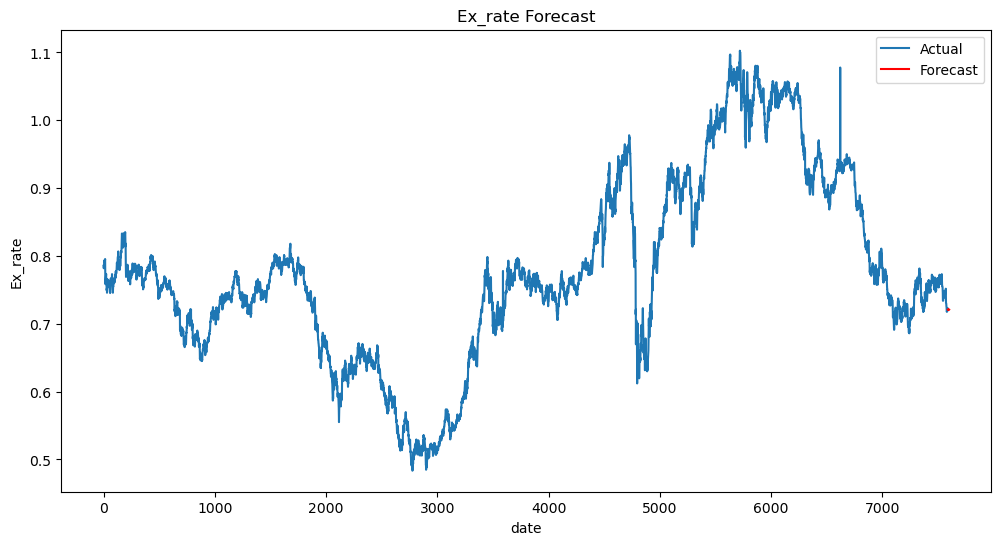

In [36]:
# Fit the Holt-Winters Seasonal model (adjust parameters as needed)
model = sm.tsa.ExponentialSmoothing(df['Ex_rate'], trend='additive', seasonal='additive', seasonal_periods=12).fit()

# Forecast future values (adjust the forecast horizon)
forecast = model.forecast(steps=12)

# Visualize the actual data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Ex_rate Forecast')
plt.xlabel('date')
plt.ylabel('Ex_rate')
plt.legend()
plt.show()

In [37]:
forecast_horizon = 12  # Number of periods to forecast
actual_values = df['Ex_rate'][-forecast_horizon:]  # Select last 'forecast_horizon' values

In [38]:
print("Length of actual_values:", len(actual_values))
print("Length of forecast:", len(forecast))  ##Print the lengths of actual_values and forecast to confirm the mismatch

Length of actual_values: 12
Length of forecast: 12


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Assuming 'df' contains your exchange rate data
actual_values = df['Ex_rate']

# ... (fit models, generate forecasts) ...

# Check lengths and adjust if necessary
forecast_horizon = len(forecast)
if forecast_horizon < len(actual_values):
    actual_values = actual_values[-forecast_horizon:]  # Slice actual_values

# Calculate error metrics
mae = mean_absolute_error(actual_values, forecast)
rmse = mean_squared_error(actual_values, forecast, squared=False)
mape = mean_absolute_percentage_error(actual_values, forecast)

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 0.0015735314232251756
RMSE: 0.001869713937547335
MAPE: 0.0021831767778246244


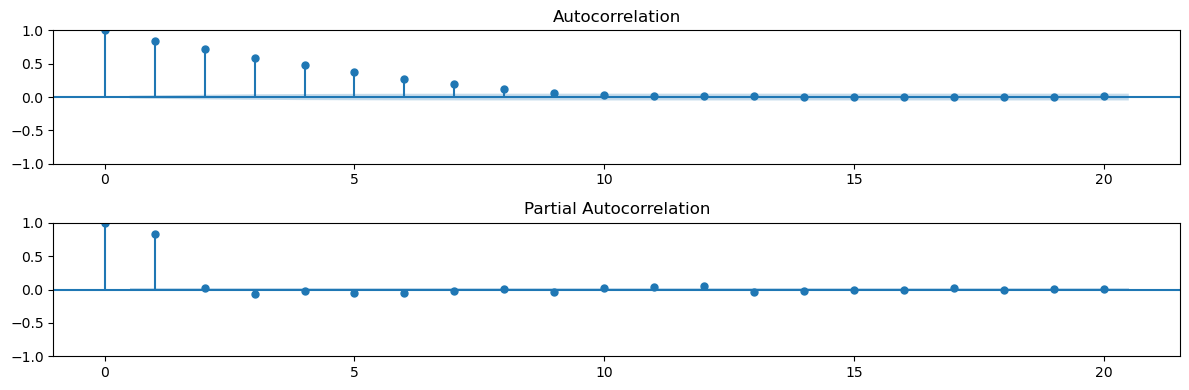

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  

# Assuming you have your time series data in `ts_df_log_diff`
fig, axes = plt.subplots(2, 1, figsize=(12, 4))  # Create a 2x1 subplot

plot_acf(ts_df_log_diff, lags=20, ax=axes[0])

plot_pacf(ts_df_log_diff, lags=20, ax=axes[1])  

plt.tight_layout()
plt.show()

In [58]:
model = ARIMA(df_diff['Ex_rate'], order=(1, 1, 1))
model_fit = model.fit()
# Forecasting
forecast = model_fit.forecast(steps=10)
# Check stationarity
result = adfuller(df['Ex_rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    # Differencing if necessary
if result[1] > 0.05:
    df_diff = df.diff().dropna()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be give

ADF Statistic: -1.6649941807381343
p-value: 0.44923273535979974
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
